In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import data
interest_rate = pd.read_csv('Resources/MORTGAGE30US.csv', parse_dates=['DATE'], index_col='DATE')
rent_data = pd.read_csv('Resources/Metro_zori_uc_sfrcondomfr_sm_month.csv',)
total_trans_value = pd.read_csv('Resources/Metro_total_transaction_value_uc_sfr_month.csv',)
sales_count = pd.read_csv('Resources/Metro_sales_count_now_uc_sfrcondo_month.csv',)
median_sale = pd.read_csv('Resources/Metro_median_sale_price_uc_sfr_month.csv',)
market_temp_index = pd.read_csv('Resources/Metro_market_temp_index_uc_sfrcondo_month.csv',)


In [3]:
# Filter the DataFrames to include only rows where the 'RegionName' column is 'United States' and select the date columns from '2015-01-31' to '2024-07-31'
us_rent_data = rent_data[rent_data['RegionName'] == 'United States']
us_total_trans_value = total_trans_value[total_trans_value['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_sales_count = sales_count[sales_count['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_median_sale = median_sale[median_sale['RegionName'] == 'United States'].loc[:, '2015-01-31':'2024-07-31']
us_market_temp_index = market_temp_index[market_temp_index['RegionName'] == 'United States']

In [4]:
#us_rent_data.head()

In [5]:
#Interest Rate Clean-Up
interest_rate.index = pd.to_datetime(interest_rate.index, format='%Y-%m-%d', errors='coerce')
filtered_interest_rate = interest_rate.loc['2015-01-01':'2024-12-31'].resample("M").mean()
#filtered_interest_rate = interest_rate.resample("M").mean()
#TEST
filtered_interest_rate.reset_index(inplace=True)
filtered_interest_rate.columns = ['Date', 'Interest Rate']  # Rename columns
filtered_interest_rate

,Date,Interest Rate
0,2015-01-31,3.6700
1,2015-02-28,3.7100
2,2015-03-31,3.7700
3,2015-04-30,3.6720
4,2015-05-31,3.8400
...,...,...
112,2024-05-31,7.0600
113,2024-06-30,6.9175
114,2024-07-31,6.8475
115,2024-08-31,6.5000


In [6]:
#Remove unnecessary columns such as 'RegionID', 'SizeRank', 'RegionType', 'StateName', and 'RegionName' from the dataframes 
# then transpose the DataFrames so that the rows become columns and vice versa
us_rent_data_transposed = us_rent_data.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'], axis=1, errors='ignore').T
us_total_trans_value_transposed = us_total_trans_value.drop(['RegionID',], axis=1, errors='ignore').T
us_sales_count_transposed = us_sales_count.drop(['RegionID'], axis=1, errors='ignore').T
us_median_sale_transposed = us_median_sale.drop(['RegionID'], axis=1, errors='ignore').T
us_market_temp_index_transposed = us_market_temp_index.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'], axis=1, errors='ignore').T

In [7]:
 # Convert index to column (Date column)
us_rent_data_transposed.reset_index(inplace=True)
us_rent_data_transposed.columns = ['Date', 'Rent Data']  # Rename columns
us_rent_data_transposed.head()

,Date,Rent Data
0,2015-01-31,1251.086247
1,2015-02-28,1257.873109
2,2015-03-31,1267.201476
3,2015-04-30,1276.622525
4,2015-05-31,1286.231877


In [8]:
 # Convert index to column (Date column)
us_total_trans_value_transposed.reset_index(inplace=True)
us_total_trans_value_transposed.columns = ['Date', 'Transaction Value']  # Rename columns
us_total_trans_value_transposed.head()

,Date,Transaction Value
0,2015-01-31,5.406546e+10
1,2015-02-28,5.589088e+10
2,2015-03-31,7.861839e+10
3,2015-04-30,8.812876e+10
4,2015-05-31,9.817811e+10


In [9]:
 # Convert index to column (Date column)
us_sales_count_transposed.reset_index(inplace=True) 
us_sales_count_transposed.columns = ['Date', 'Sales']  # Rename columns
us_sales_count_transposed.head()

,Date,Sales
0,2015-01-31,246695.0
1,2015-02-28,256674.0
2,2015-03-31,347409.0
3,2015-04-30,376879.0
4,2015-05-31,409027.0


In [10]:
# Convert index to column (Date column)
us_median_sale_transposed.reset_index(inplace=True)
us_median_sale_transposed.columns = ['Date', 'Median Sale Price']  # Rename columns
us_median_sale_transposed.head()

,Date,Median Sale Price
0,2015-01-31,173000.0
1,2015-02-28,175000.0
2,2015-03-31,184400.0
3,2015-04-30,189900.0
4,2015-05-31,198000.0


In [11]:
# Convert index to column (Date column)
us_market_temp_index_transposed.reset_index(inplace=True)
us_market_temp_index_transposed.columns = ['Date', 'heatmap']  # Rename columns
us_market_temp_index_transposed.head()

,Date,heatmap
0,2018-01-31,49.0
1,2018-02-28,50.0
2,2018-03-31,52.0
3,2018-04-30,54.0
4,2018-05-31,55.0


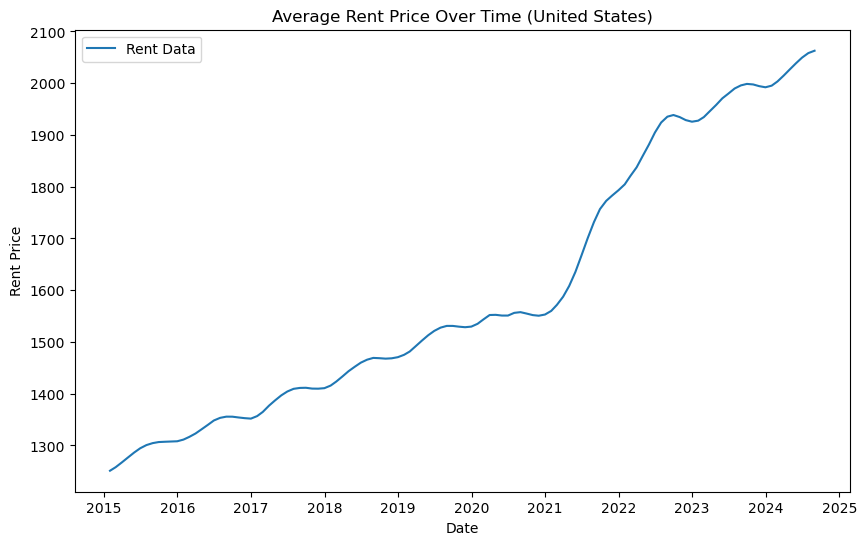

In [12]:
#ploting line chart for Avg Rent Price over time in US
us_rent_data_transposed['Date'] = pd.to_datetime(us_rent_data_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_rent_data_transposed['Date'], us_rent_data_transposed['Rent Data'], label='Rent Data')
plt.xlabel('Date')
plt.ylabel('Rent Price')
plt.title('Average Rent Price Over Time (United States)')
plt.legend()
plt.savefig('.\Graphs\Average Rent Price Over Time.png', dpi=300, bbox_inches='tight')
plt.show()

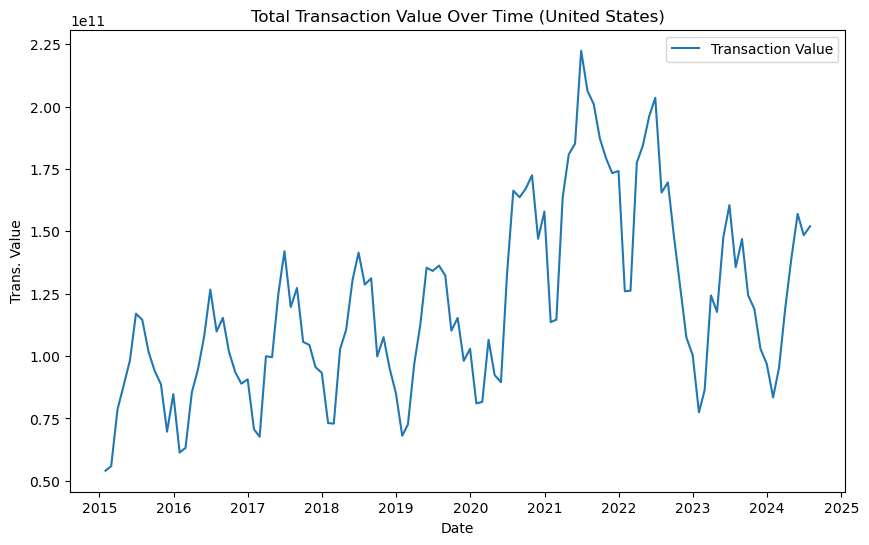

In [13]:
#ploting line chart for Total transaction Value over time in US
us_total_trans_value_transposed['Date'] = pd.to_datetime(us_total_trans_value_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_total_trans_value_transposed['Date'], us_total_trans_value_transposed['Transaction Value'], label='Transaction Value')
plt.xlabel('Date')
plt.ylabel('Trans. Value')
plt.title('Total Transaction Value Over Time (United States)')
plt.legend()
plt.savefig('.\Graphs\Total Transaction Value Over Time.png', dpi=300, bbox_inches='tight')
plt.show()

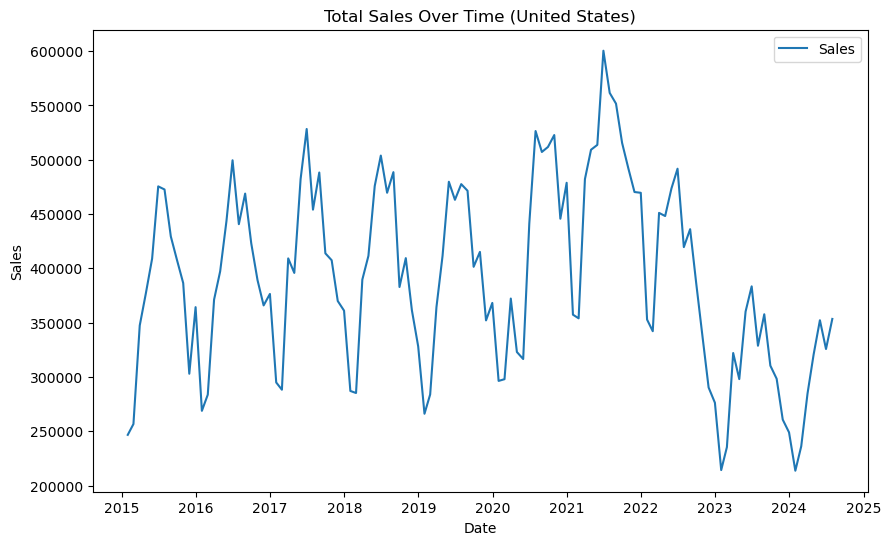

In [14]:
#ploting line chart for Avg Total Sales over time in US
us_sales_count_transposed['Date'] = pd.to_datetime(us_sales_count_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_sales_count_transposed['Date'], us_sales_count_transposed['Sales'], label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales Over Time (United States)')
plt.legend()
plt.savefig('.\Graphs\Total Sales Over Time.png', dpi=300, bbox_inches='tight')
plt.show()

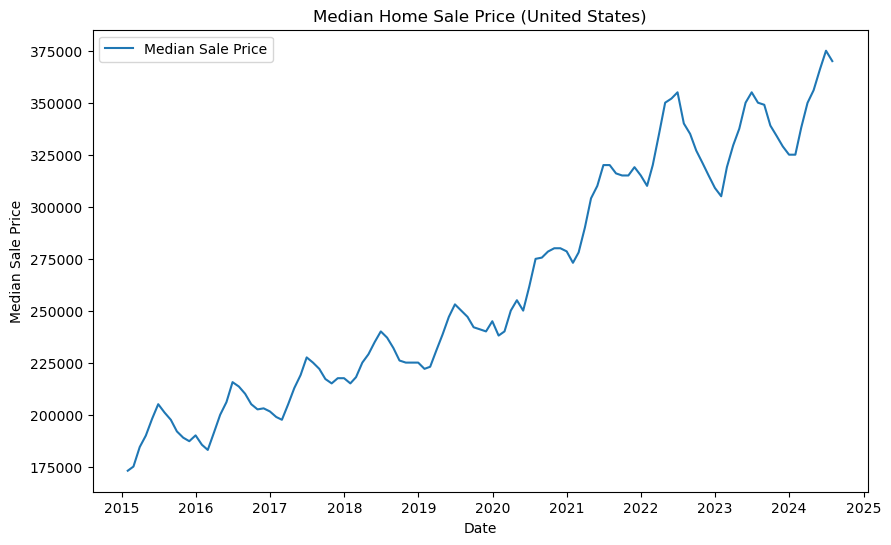

In [15]:
#ploting line chart for Median Home Sale Price over time in US
us_median_sale_transposed['Date'] = pd.to_datetime(us_median_sale_transposed['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(us_median_sale_transposed['Date'], us_median_sale_transposed['Median Sale Price'], label='Median Sale Price')
plt.xlabel('Date')
plt.ylabel('Median Sale Price')
plt.title('Median Home Sale Price (United States)')
plt.legend()
plt.savefig('.\Graphs\MedianHomeSpriceUS.png', dpi=300, bbox_inches='tight')
plt.show()

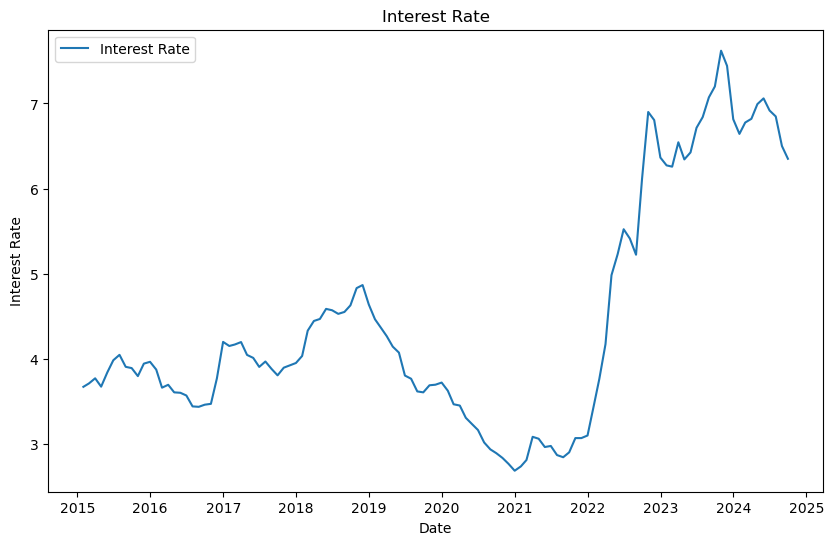

In [34]:
#ploting line chart for interest Rate over time in US
filtered_interest_rate['Date'] = pd.to_datetime(filtered_interest_rate['Date'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.plot(filtered_interest_rate['Date'], filtered_interest_rate['Interest Rate'], label='Interest Rate')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Interest Rate')
plt.legend()
plt.savefig('.\Graphs\InterestRate.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
############## Merging! #####################

In [17]:
#Merge Sales Count & Median Sale
#Double Axis Plot

In [18]:
merged_data_count_median = pd.merge(us_sales_count_transposed, us_median_sale_transposed, on='Date', how='inner')
merged_data_count_median.columns = ['Date', 'Sales Count', 'Median Sale Price']
merged_data_count_median

,Date,Sales Count,Median Sale Price
0,2015-01-31,246695.0,173000.0
1,2015-02-28,256674.0,175000.0
2,2015-03-31,347409.0,184400.0
3,2015-04-30,376879.0,189900.0
4,2015-05-31,409027.0,198000.0
...,...,...,...
110,2024-03-31,284719.0,349922.0
111,2024-04-30,320638.0,356000.0
112,2024-05-31,352250.0,366000.0
113,2024-06-30,325733.0,375000.0


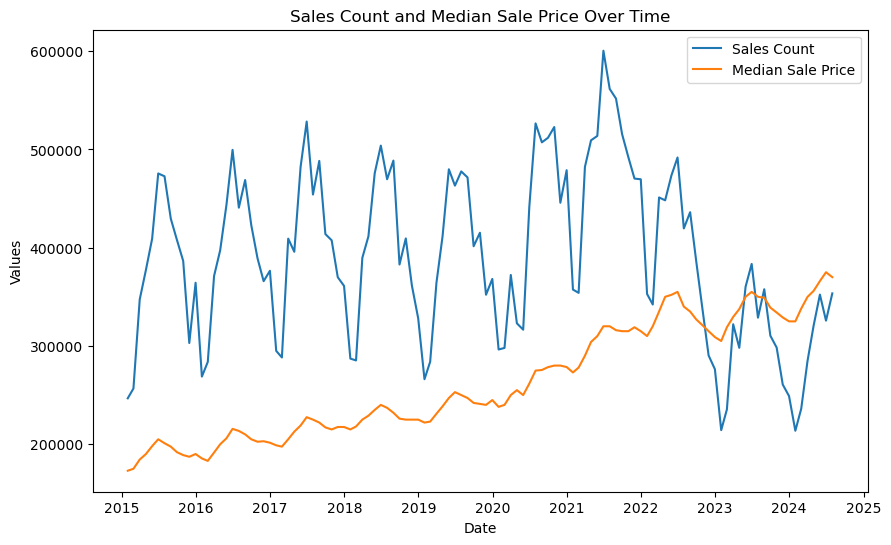

In [19]:
#ploting line chart double Axis for Sales Count and Median Sale Price OverTime in US
merged_data_count_median['Date'] = pd.to_datetime(merged_data_count_median['Date'], errors='coerce')
merged_data_count_median.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(merged_data_count_median.index, merged_data_count_median['Sales Count'], label='Sales Count')
plt.plot(merged_data_count_median.index, merged_data_count_median['Median Sale Price'], label='Median Sale Price')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Sales Count and Median Sale Price Over Time')
plt.legend()
plt.savefig('.\Graphs\SalesCountMedianSalePriceOT.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
#Merge Trans Value & Sales Count
#Double Axis Plot

In [21]:
merged_data_count_tranval = pd.merge(us_total_trans_value_transposed, us_sales_count_transposed, on='Date', how='inner')
merged_data_count_tranval.columns = ['Date', 'Transaction Value', 'Sales Count']
merged_data_count_tranval

,Date,Transaction Value,Sales Count
0,2015-01-31,5.406546e+10,246695.0
1,2015-02-28,5.589088e+10,256674.0
2,2015-03-31,7.861839e+10,347409.0
3,2015-04-30,8.812876e+10,376879.0
4,2015-05-31,9.817811e+10,409027.0
...,...,...,...
110,2024-03-31,1.192720e+11,284719.0
111,2024-04-30,1.391583e+11,320638.0
112,2024-05-31,1.569931e+11,352250.0
113,2024-06-30,1.484445e+11,325733.0


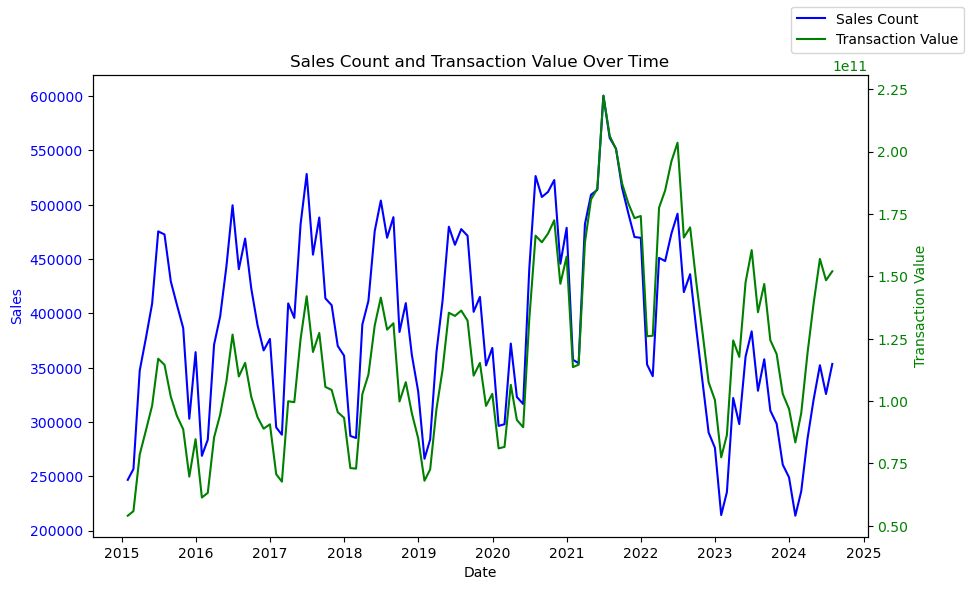

In [22]:
#Double axis plot because data values were vastly different Sales Count And Transaction Value Over time
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data_count_tranval['Date'], merged_data_count_tranval['Sales Count'], color='blue', label='Sales Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_count_tranval['Date'], merged_data_count_tranval['Transaction Value'], color='green', label='Transaction Value')
ax2.set_ylabel('Transaction Value', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Sales Count and Transaction Value Over Time')
fig.legend()
plt.savefig('.\Graphs\SalesCountTransactionValueOverT.png', dpi=300, bbox_inches='tight')

plt.show()


Question #2.How have home prices evolved over time?
Higher sales counts usually align with higher transaction values, 
indicating a positive correlation between market activity and value.

In [23]:
#Merge Interest Rate & Median Sale Price
#Double Axis Plot

In [24]:
merged_data_median_rate = pd.merge(filtered_interest_rate, us_median_sale_transposed, on='Date', how='inner')
merged_data_median_rate.head()

,Date,Interest Rate,Median Sale Price
0,2015-01-31,3.670,173000.0
1,2015-02-28,3.710,175000.0
2,2015-03-31,3.770,184400.0
3,2015-04-30,3.672,189900.0
4,2015-05-31,3.840,198000.0


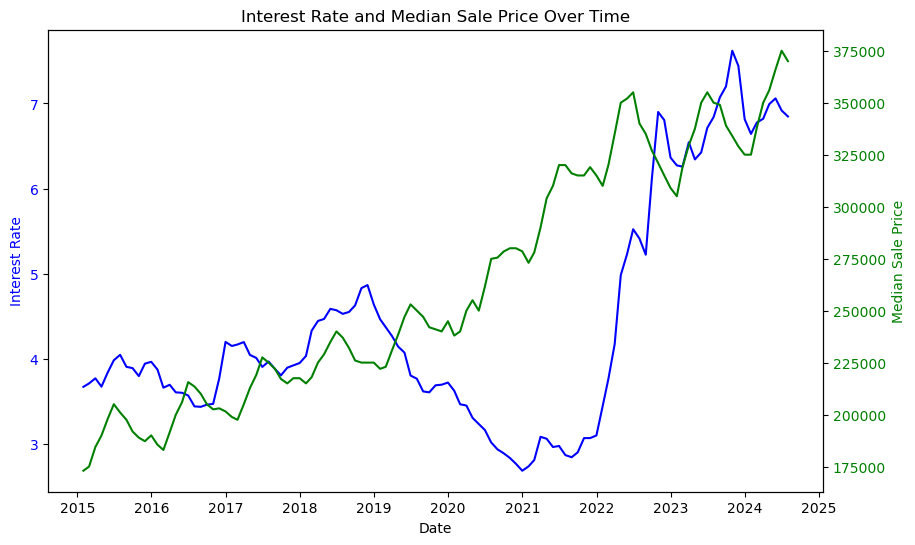

In [25]:
#ploting line chart double Axis for Interest Rate and Median Sale Price OverTime in US
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data_median_rate['Date'], merged_data_median_rate['Interest Rate'], color='blue', label='Interest Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_median_rate['Date'], merged_data_median_rate['Median Sale Price'], color='green', label='Median Sale Price')
ax2.set_ylabel('Median Sale Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Interest Rate and Median Sale Price Over Time')
plt.savefig('.\Graphs\IntRateMedianSalePriceOverT.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
#Merge Interest Rate & US Sales Count
#Double Axis Plot

In [27]:
merged_data_sales_rate = pd.merge(filtered_interest_rate, us_sales_count_transposed, on='Date', how='inner')
merged_data_sales_rate.head()

,Date,Interest Rate,Sales
0,2015-01-31,3.670,246695.0
1,2015-02-28,3.710,256674.0
2,2015-03-31,3.770,347409.0
3,2015-04-30,3.672,376879.0
4,2015-05-31,3.840,409027.0


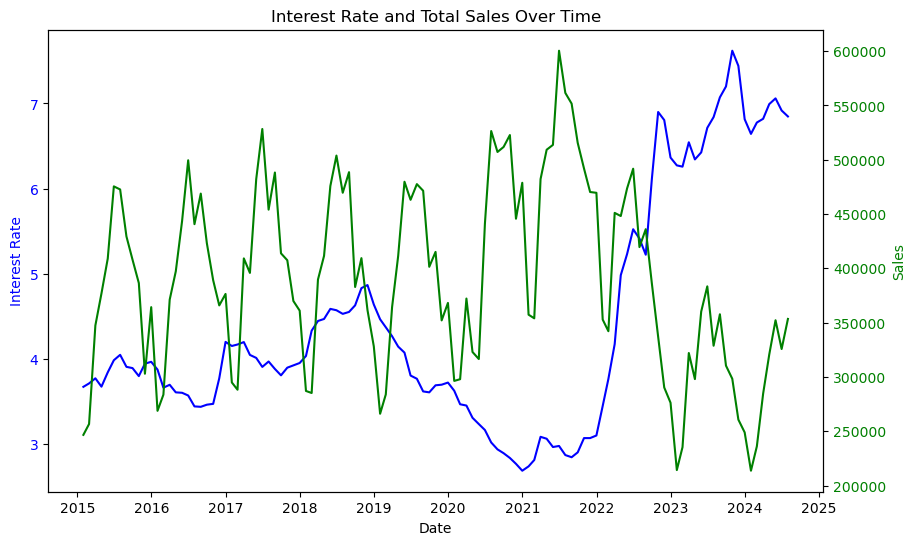

In [28]:
#ploting line chart double Axis for Sales Count and Total Sales OverTime in US
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_data_sales_rate['Date'], merged_data_sales_rate['Interest Rate'], color='blue', label='Interest Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(merged_data_sales_rate['Date'], merged_data_sales_rate['Sales'], color='green', label='Sales')
ax2.set_ylabel('Sales', color='green')
ax2.tick_params(axis='y', labelcolor='green')
plt.title('Interest Rate and Total Sales Over Time')
plt.savefig('.\Graphs\IntRateTotalSalesOverT.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Resample the data monthly and calculate the mean
interest_rate_resampled = filtered_interest_rate.resample('M', on='Date').mean()
us_median_sale_price_resampled = us_median_sale_transposed.resample('M', on='Date').mean()

# Merge the dataframes on 'Date'
merged_data = pd.merge(interest_rate_resampled, us_median_sale_price_resampled, on='Date')

# Calculate correlation
correlation = merged_data.corr()
print(correlation)


                   Interest Rate  Median Sale Price
Interest Rate           1.000000           0.566799
Median Sale Price       0.566799           1.000000


In [30]:
# the above correlation shows a positive correlation between median sale price and interest rate, howver it seems to be moderate
#  meaning that interest rates are not the sole factor driving housing prices. 
# we should consider other factors(variables) (e.g., housing supply, demand, regional factors) to get a fuller picture of what drives price changes.

1. How do changes in interest rates correlate with housing prices?
Higher interest rates often correspond with lower home sales, while lower interest rates tend to push prices up, 
although this relationship is not perfectly linear.

In [31]:
# Resample the data monthly and calculate the mean
us_sales_Count_resampled = us_sales_count_transposed.resample('M', on='Date').mean()
us_median_sale_price_resampled = us_median_sale_transposed.resample('M', on='Date').mean()

# Merge the dataframes on 'Date'
merged_salescount_median = pd.merge(us_sales_Count_resampled, us_median_sale_price_resampled, on='Date')

# Calculate correlation
correlation_sales = merged_salescount_median.corr()
print(correlation_sales)

                      Sales  Median Sale Price
Sales              1.000000           0.001904
Median Sale Price  0.001904           1.000000


In [64]:
#import seaborn as sns
#plt.figure(figsize=(10, 6))

# Assuming 'merged_data_count_tranval' includes sales and transaction values
#sns.heatmap(merged_data_count_tranval.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Heatmap - Sales & Transaction Value')
#plt.show()


In [65]:
# the above Heatmap Shows the following: 
# 1. Date vs. Sales Count (0.53): This shows a moderate positive correlation between Date and Sales Count,
#indicating that over time, the number of sales has increased. This suggests that demand has risen steadily over the period observed. 
# but this is sales vs Date which might not mean much..

In [66]:
merged_data_count_tranval['Transaction Value']

0      5.406546e+10
1      5.589088e+10
2      7.861839e+10
3      8.812876e+10
4      9.817811e+10
           ...     
110    1.192720e+11
111    1.391583e+11
112    1.569931e+11
113    1.484445e+11
114    1.520324e+11
Name: Transaction Value, Length: 115, dtype: float64

In [67]:
# Lagging Sales Count and Transaction Value by 1 month
merged_data_count_tranval['Lagged Sales Count'] = merged_data_count_tranval['Sales Count'].shift(1)
merged_data_count_tranval['Lagged Transaction Value'] = merged_data_count_tranval['Transaction Value'].shift(1)

# Merge the lagged data with interest rates
merged_lagged_interest = pd.merge(filtered_interest_rate, merged_data_count_tranval, on='Date', how='inner')

# Calculate correlation between lagged values and interest rates
correlation_sales_interest = merged_lagged_interest['Lagged Sales Count'].corr(merged_lagged_interest['Interest Rate'])
correlation_value_interest = merged_lagged_interest['Lagged Transaction Value'].corr(merged_lagged_interest['Interest Rate'])

print(f"Correlation between lagged sales count and interest rate: {correlation_sales_interest}")
print(f"Correlation between lagged transaction value and interest rate: {correlation_value_interest}")


Correlation between lagged sales count and interest rate: -0.5203951061676756
Correlation between lagged transaction value and interest rate: -0.034708287752238824


In [68]:
#The lagged sales count does not seem to be affected by changes in interest rates,
# meaning other factors might drive the number of sales in the market.

# The transaction value, however, shows a clearer inverse relationship 
# with interest rates, aligning with the expectation that higher interest rates reduce
# the value of transactions (possibly due to less purchasing power from higher mortgage costs).

In [69]:
triple_merge = pd.merge(merged_data_count_median, us_rent_data_transposed, on='Date', how='inner')


In [70]:
triple_merge.head() 

,Date,Sales Count,Median Sale Price,Rent Data
0,2015-01-31,246695.0,173000.0,1251.086247
1,2015-02-28,256674.0,175000.0,1257.873109
2,2015-03-31,347409.0,184400.0,1267.201476
3,2015-04-30,376879.0,189900.0,1276.622525
4,2015-05-31,409027.0,198000.0,1286.231877


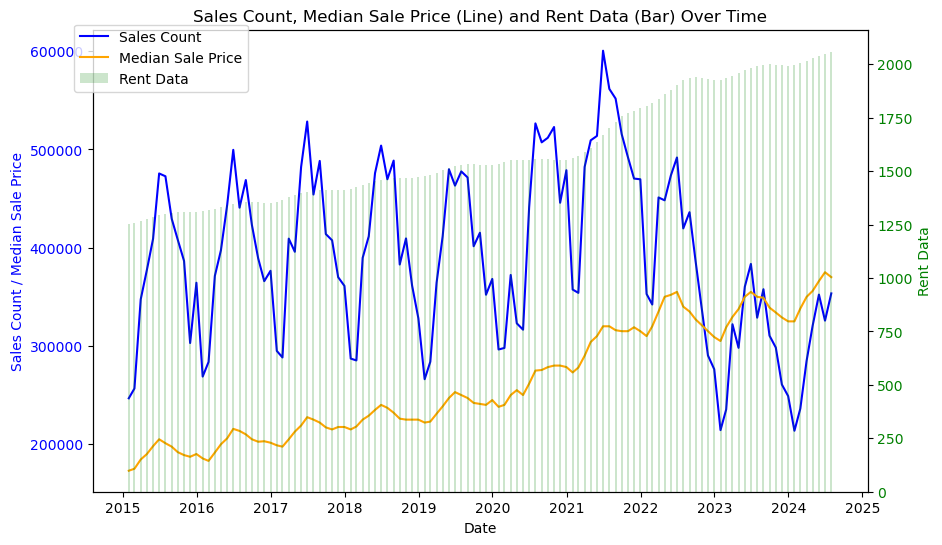

In [72]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# Plot Sales Count and Median Sale Price as line charts
ax1.plot(triple_merge['Date'], triple_merge['Sales Count'], color='blue', label='Sales Count')
ax1.plot(triple_merge['Date'], triple_merge['Median Sale Price'], color='orange', label='Median Sale Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales Count / Median Sale Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second axis for Rent Data as bars
ax2 = ax1.twinx()
ax2.bar(triple_merge['Date'], triple_merge['Rent Data'], color='green', alpha=0.2, width=10, label='Rent Data')  # Bar chart for Rent Data
ax2.set_ylabel('Rent Data', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Add a title
plt.title('Sales Count, Median Sale Price (Line) and Rent Data (Bar) Over Time')
# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.savefig('.\Graphs\TripleMergeOverT.png', dpi=300, bbox_inches='tight')
plt.show()

3. How do fluctuations in rent data relate to changes in sales count and median sale prices over time?
**Conclusion**: 
- Consistent upward trend suggests growing demand, potentially due to 
affordability challenges in homeownership. 

- Between 2022 and 2024, fewer people could afford to buy homes due to 
increased mortgage rates and median sale price, increasing rent prices. 

- Based on our findings, there is a loose positive correlation between median sale 
price and median rent.